In [1]:
# Рассмотрим кластеризацию набора данных Iris. Алгоритм кластеризации 
# пытается выделить группы данных безотносительно к каким-либо меткам.

In [3]:
import seaborn as sns
import pandas as pd
import sklearn

In [19]:
iris = sns.load_dataset('iris')

In [20]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
X_iris = iris.drop('species', axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# Понизим размерность данных Iris с помощью PCA (метода главных компонент)

# Как видим выше, данные  Iris 4-х мерны, найдем подходящее
# представление данных более низкой размерности, сохраняющее существенные признаки данных.

from sklearn.decomposition import PCA

model = PCA(n_components=2)

In [23]:
model.fit(X_iris)

PCA(n_components=2)

In [24]:
X_2D = model.transform(X_iris)

In [25]:
# Вставим в исходную таблицу результаты, для построения графиков

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/home/alex/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


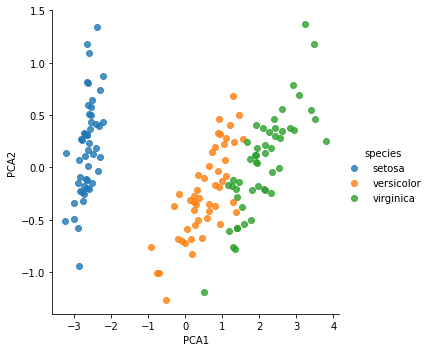

In [26]:
# Строим график

sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

In [27]:
# Воспользуемся алгоритмом кластеризации "Смесь Гауссовых распределений"
# (GMM)!

In [28]:
# Импортируем GMM
from sklearn.mixture import GaussianMixture
#
# Создаем экземпляр модели
model = GaussianMixture(n_components=3, covariance_type='full')

In [29]:
model.fit(X_iris)

GaussianMixture(n_components=3)

In [30]:
# Определяем метки кластеров

y_gmm = model.predict(X_iris)

In [31]:
# Визуализируем полученные данные. Для этого добавим столбец cluster
# в DataFrame Iris и воспользуемся библиотекой Seaborn

iris['cluster'] = y_gmm
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


/home/alex/jupyter/environment/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


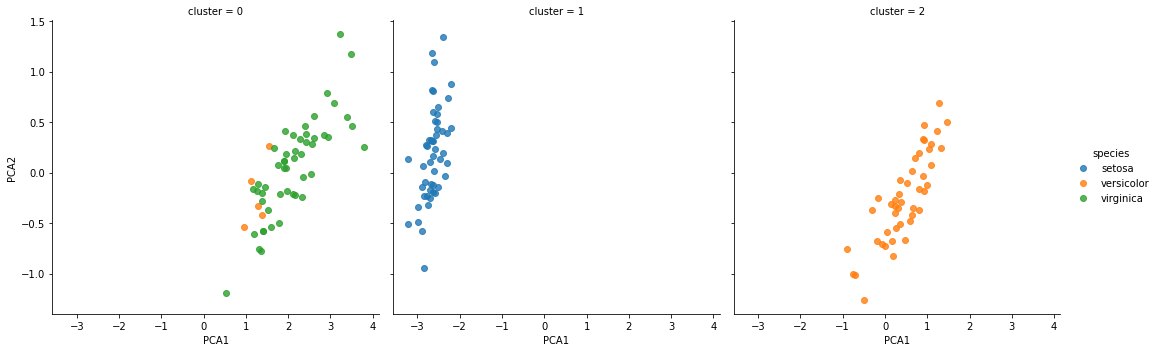

In [32]:
sns.lmplot('PCA1', 'PCA2', hue='species', col='cluster', data=iris, fit_reg=False)

In [ ]:
# Разбив данные в соответствии с номерами кластеров, мы видим, насколько хорошо алгоритм GMM восстановил требуемые
# метки по кластерам.